# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
llamadas_df=pd.read_csv('megaline_calls.csv')
internet_df=pd.read_csv('megaline_internet.csv')
mensajes_df=pd.read_csv('megaline_messages.csv')
planes_df=pd.read_csv('megaline_plans.csv')
usuarios_df=pd.read_csv('megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
planes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
planes_df.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
planes_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [6]:
planes_df.duplicated().sum()

0

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
planes_df.rename(columns={'plan_name':'plan'},inplace=True)

In [8]:
planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Unificamos el nombre del plan con los demas DF.

## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

usuarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios
usuarios_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
usuarios_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

No es necesario rellenar los valores nulos por que representan una subscripcion vigente , ya que no existe una fecha de fin de subcripcion por que siguen subscritos.

In [12]:
usuarios_df.duplicated().sum()

0

In [13]:
usuarios_df.duplicated(subset=['user_id']).sum() 

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
usuarios_df['reg_date']=pd.to_datetime(usuarios_df['reg_date'],format='%Y-%m-%d')

In [15]:
usuarios_df['reg_mes']=pd.DatetimeIndex(usuarios_df['reg_date']).month

In [16]:
usuarios_df['churn_date']=pd.to_datetime(usuarios_df['churn_date'],format='%Y-%m-%d')

In [17]:
usuarios_df['churn_mes']=pd.DatetimeIndex(usuarios_df['churn_date']).month

In [18]:
usuarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mes     500 non-null    int32         
 9   churn_mes   34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(4)
memory usage: 37.2+ KB


In [19]:
usuarios_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_mes,churn_mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


## Llamadas

In [20]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

llamadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Imprime una muestra de datos para las llamadas

llamadas_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [22]:
llamadas_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
llamadas_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [24]:
llamadas_df.duplicated().sum()

0

In [25]:
#compruevo que la misma llamada para el mismo usuario no se repite dos veces.
llamadas_df.duplicated(subset=['id','user_id']).sum()

0

No se percibe alguna anomalia o datos que Corregir

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [26]:
llamadas_df['call_date']=pd.to_datetime(llamadas_df['call_date'],format='%Y-%m-%d')

In [27]:
llamadas_df.rename(columns={'id':'calls_id'},inplace=True)

In [28]:
llamadas_df['mes']=pd.DatetimeIndex(llamadas_df['call_date']).month

In [29]:
def redondeo_calls(tiempo):
    redondeo=math.ceil(tiempo)
    return redondeo

In [30]:
llamadas_df['duracion_redondeada'] = llamadas_df['duration'].apply(redondeo_calls)

In [31]:
llamadas_df.head()

,calls_id,user_id,call_date,duration,mes,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


## Mensajes

In [32]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [33]:
# Imprime una muestra de datos para los mensajes
mensajes_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [34]:
mensajes_df.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [35]:
mensajes_df.duplicated().sum()

0

In [36]:
mensajes_df.duplicated(subset=['id','user_id']).sum() 

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [37]:
mensajes_df['message_date']=pd.to_datetime(mensajes_df['message_date'],format='%Y-%m-%d')

In [38]:
mensajes_df.rename(columns={'id':'message_id'},inplace=True)

In [39]:
mensajes_df['mes']=pd.DatetimeIndex(mensajes_df['message_date']).month

In [40]:
mensajes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


In [41]:
mensajes_df.head()

,message_id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [42]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [43]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [44]:
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [45]:
internet_df.duplicated().sum()

0

In [46]:
internet_df.duplicated(subset=['id','user_id']).sum() 

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [47]:
internet_df['session_date']=pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')

In [48]:
internet_df.rename(columns={'id':'internet_id'},inplace=True)

In [49]:
internet_df['mes']=pd.DatetimeIndex(internet_df['session_date']).month
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   mes           104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


In [50]:
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [51]:
internet_df.describe()

,user_id,session_date,mb_used,mes
count,104825.000000,104825,104825.000000,104825.000000
mean,1242.496361,2018-09-26 11:37:55.048890880,366.713701,9.342552
min,1000.000000,2018-01-15 00:00:00,0.000000,1.000000
25%,1122.000000,2018-08-11 00:00:00,136.080000,8.000000
50%,1236.000000,2018-10-13 00:00:00,343.980000,10.000000
75%,1367.000000,2018-11-27 00:00:00,554.610000,11.000000
max,1499.000000,2018-12-31 00:00:00,1693.470000,12.000000
std,142.053913,NaN,277.170542,2.400404


Nos damos cuenta que existen usuarios que no utilizan sus datos, que porcentaje de usuarios no utilizan datos ?

In [52]:
(len(internet_df.query('mb_used==0'))/len(internet_df))*100

13.11423801574052

In [53]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   mes           104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


In [54]:
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


El 13% de los usuarios no utiliza sus mb

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [55]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
surf_costo_mensual=20
surf_minutos_mensual=500
surf_mensajes_mensual=50
surf_datos_mensual=15
surf_cargo_minuto=0.03
surf_cargo_mensaje=0.03
surf_cargo_datos=10

ultimate_costo_mensual=70
ultimate_minutos_mensual=3000
ultimate_mensajes_mensual=1000
ultimate_datos_mensual=30
ultimate_cargo_minuto=0.01
ultimate_cargo_mensaje=0.01
ultimate_cargo_datos=7

print('Costos y cragos por plan:')
print('surf costo mensual:',surf_costo_mensual)
print('surf minutos incluidos al mes:',surf_minutos_mensual)
print('surf mensajes incluidos al mes:',surf_mensajes_mensual)
print('surf datos incluidos al mes:',surf_datos_mensual)
print('surf cargo por minuto extra:',surf_cargo_minuto)
print('surf cargo por mensaje extra:',surf_cargo_mensaje)
print('surf cargo por Gb extra:',surf_cargo_datos)
print()
print()
print('ultimate costo mensual:',ultimate_costo_mensual)
print('ultimate minutos incluidos al mes:',ultimate_minutos_mensual)
print('ultimate mensajes incluidos al mes:',ultimate_mensajes_mensual)
print('ultimate datos incluidos al mes:',ultimate_datos_mensual)
print('ultimate cargo por minuto extra:',ultimate_cargo_minuto)
print('ultimate cargo por mensaje extra:',ultimate_cargo_mensaje)
print('ultimate cargo por Gb extra:',ultimate_cargo_datos)


Costos y cragos por plan:
surf costo mensual: 20
surf minutos incluidos al mes: 500
surf mensajes incluidos al mes: 50
surf datos incluidos al mes: 15
surf cargo por minuto extra: 0.03
surf cargo por mensaje extra: 0.03
surf cargo por Gb extra: 10


ultimate costo mensual: 70
ultimate minutos incluidos al mes: 3000
ultimate mensajes incluidos al mes: 1000
ultimate datos incluidos al mes: 30
ultimate cargo por minuto extra: 0.01
ultimate cargo por mensaje extra: 0.01
ultimate cargo por Gb extra: 7


In [56]:
user_plan=usuarios_df[['user_id','plan','city']]
user_plan

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [57]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_mes_user=llamadas_df.pivot_table(index=['user_id','mes'],values=['calls_id'],aggfunc=['count'])
llamadas_mes_user.columns=['llamadas_hechas']
llamadas_mes_user=llamadas_mes_user.reset_index()
llamadas_mes_user.head()

,user_id,mes,llamadas_hechas
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [58]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_mes_user=llamadas_df.pivot_table(index=['user_id','mes'],values=['duracion_redondeada'],aggfunc=['sum'])
minutos_mes_user.columns=['minutos_usados']
minutos_mes_user=minutos_mes_user.reset_index()
minutos_mes_user.head()

,user_id,mes,minutos_usados
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [59]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_mes_user=mensajes_df.pivot_table(index=['user_id','mes'],values=['message_id'],aggfunc=['count'])
mensajes_mes_user.columns=['cantidad_de _mensajes']
mensajes_mes_user=mensajes_mes_user.reset_index()
mensajes_mes_user.head()

,user_id,mes,cantidad_de _mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [60]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
megas_mes_user=internet_df.pivot_table(index=['user_id','mes'],values=['mb_used'],aggfunc=['sum'])
megas_mes_user.columns=['megas_totales_usados']
megas_mes_user=megas_mes_user.reset_index()
megas_mes_user.head()

,user_id,mes,megas_totales_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [61]:
def megas_redondeados (mb):
    redondeo=math.ceil(mb/1024) 
    return redondeo

In [62]:
megas_mes_user['megas_totales_redondeados(Gb)']=megas_mes_user['megas_totales_usados'].apply(megas_redondeados)
megas_mes_user.head()

,user_id,mes,megas_totales_usados,megas_totales_redondeados(Gb)
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


Se redondean los datos y se pasan a gb para tener un mejor manejo de cantidades.

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [63]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
llamadas_minutos=llamadas_mes_user.merge(minutos_mes_user,on=['user_id','mes'],how='outer')

In [64]:
llamadas_minutos_mensajes=llamadas_minutos.merge(mensajes_mes_user,on=['user_id','mes'],how='outer')

In [65]:
llamadas_minutos_mensajes_megas=llamadas_minutos_mensajes.merge(megas_mes_user,on=['user_id','mes'],how='outer')

In [66]:
# Añade la información de la tarifa

general=llamadas_minutos_mensajes_megas.merge(user_plan,on=['user_id'],how='outer')

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [67]:
# Calcula el ingreso mensual para cada usuario

In [68]:
def minutos_por_cobrar(fila):
    plan=fila['plan']
    minutos_usados=fila['minutos_usados']
    
    minutos_cobrables=0
    if plan=='surf':
        if minutos_usados > surf_minutos_mensual:
            minutos_cobrables=minutos_usados-surf_minutos_mensual
    elif plan=='ultimate':
        if minutos_usados > ultimate_minutos_mensual:
            minutos_cobrables=minutos_usados-ultimate_minutos_mensual

    return minutos_cobrables


In [69]:
general['minutos_cobrables']=general.apply(minutos_por_cobrar, axis=1)

In [70]:
len(general.query('minutos_cobrables>0'))/len(general)

0.2457663916630482

In [71]:
def mensajes_por_cobrar(fila):
    plan=fila['plan']
    mensajes_usados=fila['cantidad_de _mensajes']
    
    mensajes_cobrables=0
    if plan=='surf':
        if mensajes_usados > surf_mensajes_mensual:
            mensajes_cobrables=mensajes_usados-surf_mensajes_mensual
    elif plan=='ultimate':
        if mensajes_usados > ultimate_mensajes_mensual:
            mensajes_cobrables=mensajes_usados-ultimate_mensajes_mensual

    return mensajes_cobrables

In [72]:
general['mensajes_cobrables']=general.apply(mensajes_por_cobrar, axis=1)

In [73]:
len(general.query('mensajes_cobrables>0'))/len(general)

0.14763352149370387

In [74]:
def gb_por_cobrar(fila):
    plan=fila['plan']
    gb_usados=fila['megas_totales_redondeados(Gb)']
    
    gb_cobrables=0
    if plan=='surf':
        if gb_usados > surf_datos_mensual:
            gb_cobrables=gb_usados-surf_datos_mensual
    elif plan=='ultimate':
        if gb_usados > ultimate_datos_mensual:
            gb_cobrables=gb_usados-ultimate_datos_mensual

    return gb_cobrables

In [75]:
general['gb_cobrables']=general.apply(gb_por_cobrar, axis=1)

In [76]:
len(general.query('gb_cobrables>0'))/len(general)

0.4133738601823708

In [77]:
def tot_por_cobrar(fila):
    plan=fila['plan']
    minutos_cobrar=fila['minutos_cobrables']
    mensajes_cobrar=fila['mensajes_cobrables']
    gb_cobrar=fila['gb_cobrables']
    
    total_cobrar=0
    
    if plan=='surf':
        total_cobrar=surf_costo_mensual+(minutos_cobrar*surf_cargo_minuto)+(mensajes_cobrar*surf_cargo_mensaje)+(gb_cobrar*surf_cargo_datos)
    elif plan=='ultimate':
        total_cobrar=ultimate_costo_mensual+(minutos_cobrar*ultimate_cargo_minuto)+(mensajes_cobrar*ultimate_cargo_mensaje)+(gb_cobrar*ultimate_cargo_datos)

    return total_cobrar

In [78]:
general['total_a_pagar']=general.apply(tot_por_cobrar, axis=1)

In [79]:
general.head()

,user_id,mes,llamadas_hechas,minutos_usados,cantidad_de _mensajes,megas_totales_usados,megas_totales_redondeados(Gb),plan,city,minutos_cobrables,mensajes_cobrables,gb_cobrables,total_a_pagar
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.09
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

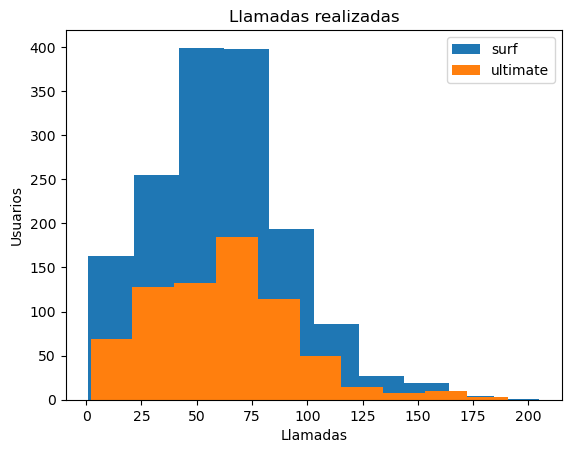

In [80]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
general[general['plan']== 'surf']['llamadas_hechas'].plot(kind='hist')
general[general['plan']== 'ultimate']['llamadas_hechas'].plot(kind='hist')
plt.title('Llamadas realizadas')
plt.xlabel('Llamadas')
plt.ylabel('Usuarios')
plt.legend(['surf','ultimate'])
plt.show()


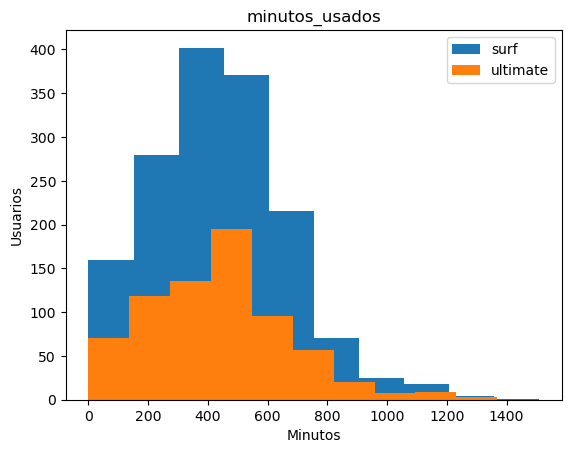

In [81]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
general[general['plan']== 'surf']['minutos_usados'].plot(kind='hist')
general[general['plan']== 'ultimate']['minutos_usados'].plot(kind='hist')
plt.title('minutos_usados')
plt.xlabel('Minutos')
plt.ylabel('Usuarios')
plt.legend(['surf','ultimate'])
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [82]:
# Calcula la media y la varianza de la duración mensual de llamadas.
duracion_mensual_mean=general.groupby('mes')['minutos_usados'].mean()
duracion_mensual_var=general.groupby('mes')['minutos_usados'].mean()
print(duracion_mensual_mean)
print(np.var(duracion_mensual_var))

mes
1.0     196.666667
2.0     366.333333
3.0     321.171429
4.0     347.197183
5.0     409.125000
6.0     420.361702
7.0     444.944134
8.0     418.956522
9.0     425.942238
10.0    443.988131
11.0    437.570720
12.0    478.269565
Name: minutos_usados, dtype: float64
5319.6395736421555


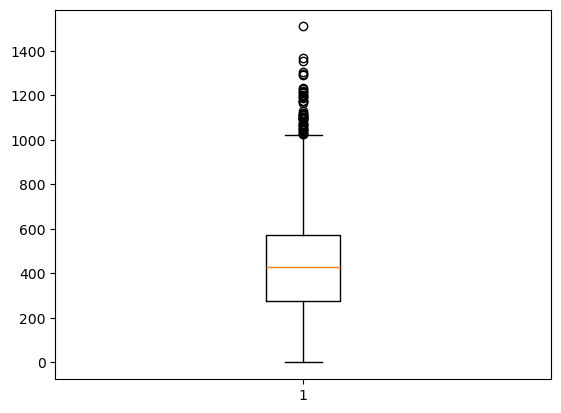

In [83]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.boxplot(general['minutos_usados'].dropna())
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

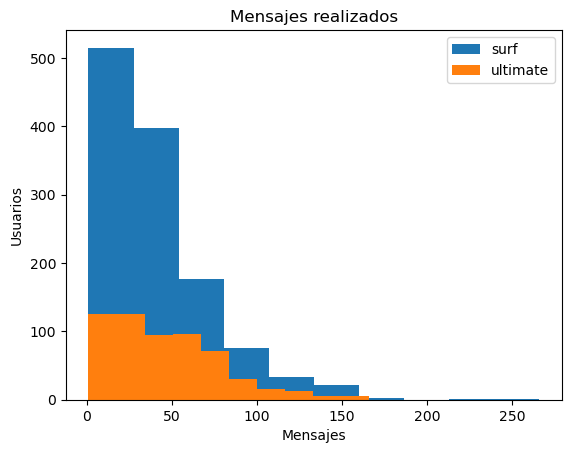

In [84]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
general[general['plan']== 'surf']['cantidad_de _mensajes'].plot(kind='hist')
general[general['plan']== 'ultimate']['cantidad_de _mensajes'].plot(kind='hist')
plt.title('Mensajes realizados')
plt.xlabel('Mensajes')
plt.ylabel('Usuarios')
plt.legend(['surf','ultimate'])
plt.show()


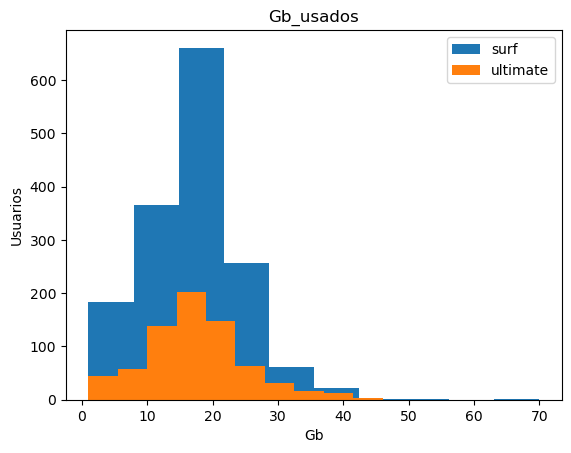

In [85]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

general[general['plan']== 'surf']['megas_totales_redondeados(Gb)'].plot(kind='hist')
general[general['plan']== 'ultimate']['megas_totales_redondeados(Gb)'].plot(kind='hist')
plt.title('Gb_usados')
plt.xlabel('Gb')
plt.ylabel('Usuarios')
plt.legend(['surf','ultimate'])
plt.show()

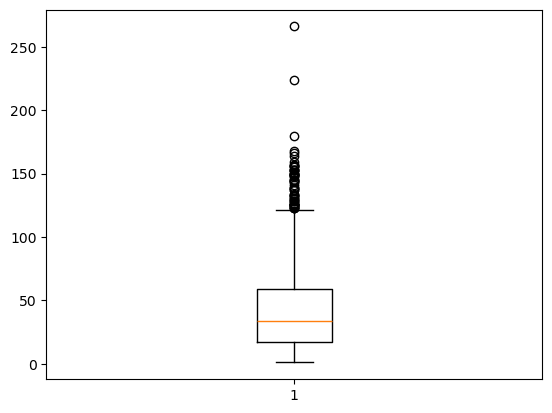

In [86]:
plt.boxplot(general['cantidad_de _mensajes'].dropna())
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

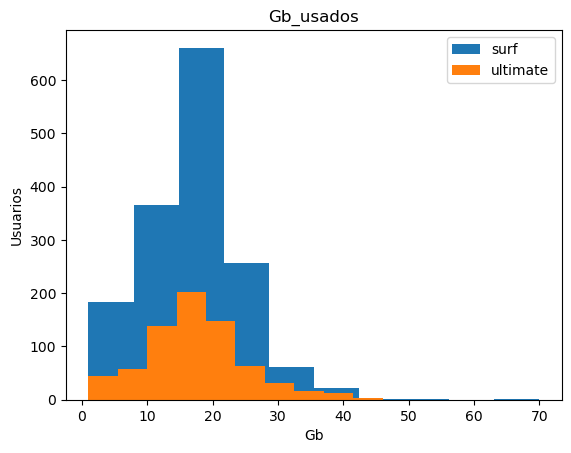

In [87]:
general[general['plan']== 'surf']['megas_totales_redondeados(Gb)'].plot(kind='hist')
general[general['plan']== 'ultimate']['megas_totales_redondeados(Gb)'].plot(kind='hist')
plt.title('Gb_usados')
plt.xlabel('Gb')
plt.ylabel('Usuarios')
plt.legend(['surf','ultimate'])
plt.show()

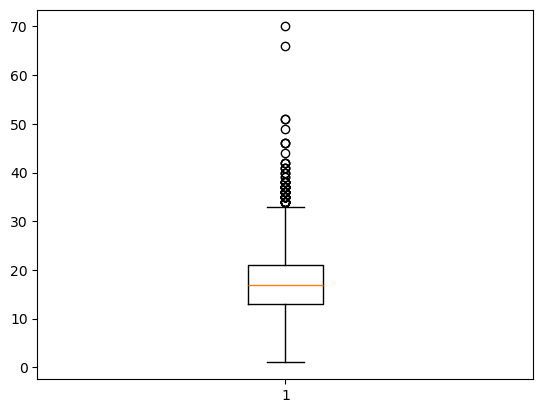

In [88]:
plt.boxplot(general['megas_totales_redondeados(Gb)'].dropna())
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

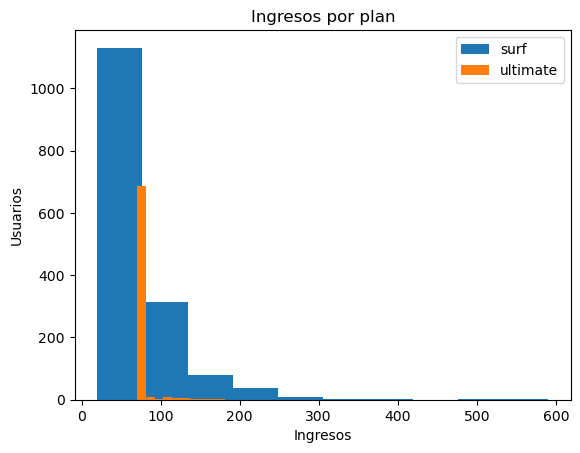

In [89]:
general[general['plan']== 'surf']['total_a_pagar'].plot(kind='hist')
general[general['plan']== 'ultimate']['total_a_pagar'].plot(kind='hist')
plt.title('Ingresos por plan')
plt.xlabel('Ingresos')
plt.ylabel('Usuarios')
plt.legend(['surf','ultimate'])
plt.show()

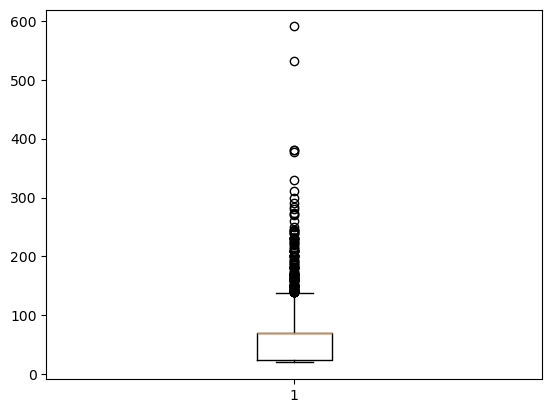

In [90]:
plt.boxplot(general['total_a_pagar'].dropna())
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [91]:
# Prueba las hipótesis
planes=['surf','ultimate']
for plan in planes:
    rentabilidad=general[general['plan']==plan]['total_a_pagar'].sum()
    print(f'La rentabilidad total de {plan} es de {rentabilidad}' )

La rentabilidad total de surf es de 95611.18
La rentabilidad total de ultimate es de 52346.0


La hipotesis nula  a trabajar es que la rentabilidad promedio del plan "surf" es igual a el plan  "ultimate"

In [92]:
alpha=0.05

In [93]:
sample_1 = general.query('plan=="surf"')['total_a_pagar'] 

In [94]:
sample_2 = general.query('plan=="ultimate"')['total_a_pagar'] 

In [95]:
resultado = st.ttest_ind(sample_1,sample_2, equal_var=False)
print (f'p-value:{resultado.pvalue}')

p-value:1.218411585212325e-15


In [96]:
if resultado.pvalue<alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [97]:
# Prueba las hipótesis
sample_a = general.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_a_pagar'] 

In [98]:
sample_b = general.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_a_pagar'] 

In [99]:
resultado_a_b = st.ttest_ind(sample_a,sample_b, equal_var=False)
print (f'p-value:{resultado_a_b.pvalue}')

p-value:0.038703226612928854


In [100]:
if resultado.pvalue<alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

La mayor parte de las usuarios estan inscrito dentro del plan "surf"  sin embrgo se nota una tendencia a usar mas los datos moviles que a utilizar los mensaje sincluidos lo cual los hace pagar mas sin aprovechar los mensjes de texto que ya pagaron. Lo cual atribullo a que los contactos con quienes se comunican tambien usan datos moviles lo cual son orilla a utilizar el mismo canal de comunicacion.
podemos rechazar la hipotesis de que en promedio ambos planes nos generan el mismo rendimeinto y que una sola region aun que sea la mas usuada compite con el resto de regiones sumadas.